In [3]:
#Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import rasterio
import os
from functions import *
from pathlib import Path

In [4]:
#Satellite datas directory
data_dir = Path('../Data')

In [42]:
for file in os.listdir(data_dir):
    if file.endswith('.tif'):
        print(f'Processing {file}...')
        read_raster(data_dir / file, data_dir)
        

Processing landsat_9.tif...
Calculation of NDVI, EVI, NDWI in progress... of the raster file: {basename} 
Raster file saved at: ../Data/NDVI/landsat_9NDVI.tif
Raster file saved at: ../Data/EVI/landsat_9EVI.tif
Raster file saved at: ../Data/NDWI/landsat_9NDWI.tif
Processing landsat_8.tif...
Calculation of NDVI, EVI, NDWI in progress... of the raster file: {basename} 
Raster file saved at: ../Data/NDVI/landsat_8NDVI.tif
Raster file saved at: ../Data/EVI/landsat_8EVI.tif
Raster file saved at: ../Data/NDWI/landsat_8NDWI.tif
Processing sentinel_2.tif...


<span style="font-family: 'Times New Roman', Times, serif; font-size: 1.5em;">Plotting the Indexes</span>


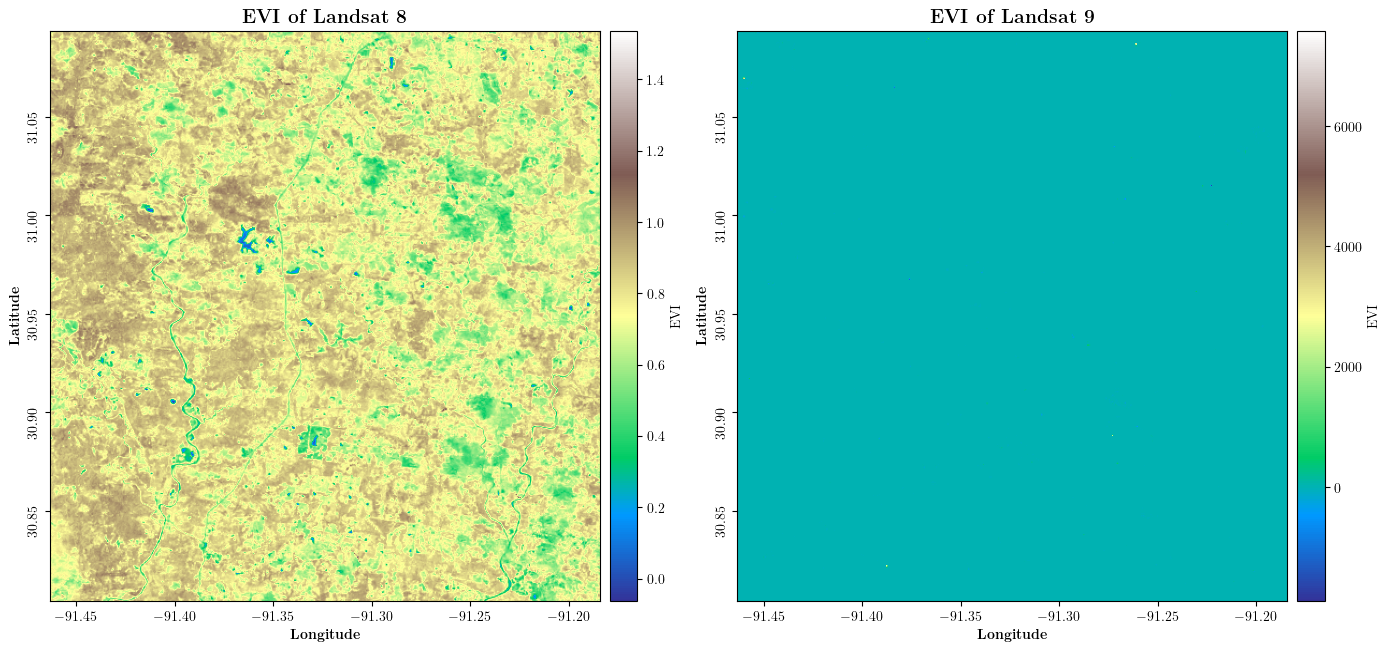

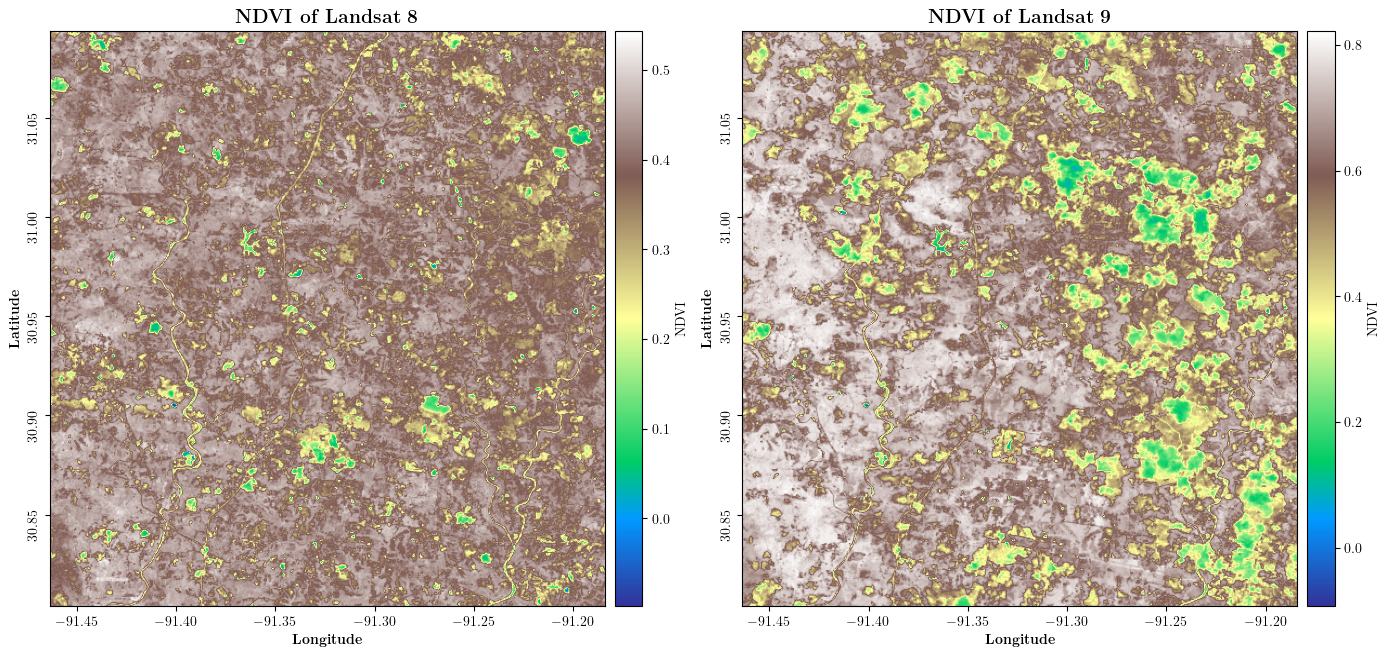

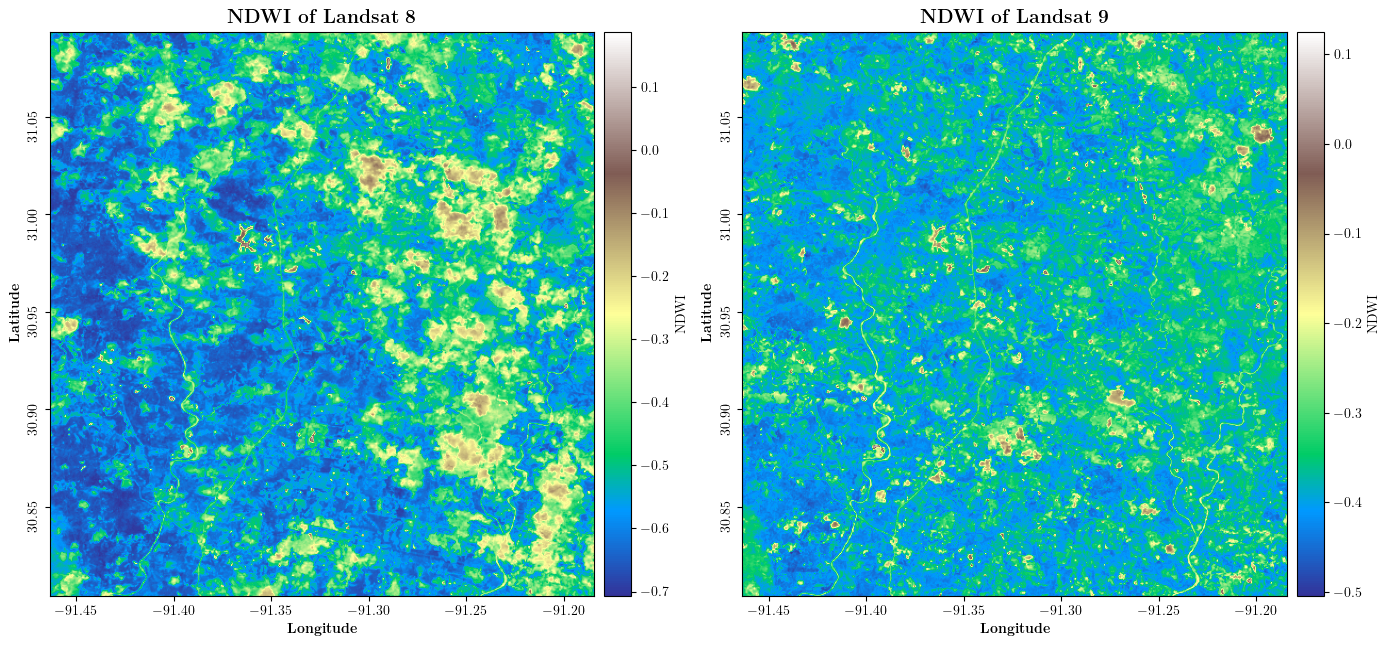

In [7]:
#Calling the function to plot the rasters
plot_rasters_with_custom_titles('/Users/supath/Downloads/GeoWorldCode/Data/EVI', ["EVI of Landsat 8", "EVI of Landsat 9"], "EVI")
plot_rasters_with_custom_titles('/Users/supath/Downloads/GeoWorldCode/Data/NDVI', ["NDVI of Landsat 8", "NDVI of Landsat 9"], "NDVI")
plot_rasters_with_custom_titles('/Users/supath/Downloads/GeoWorldCode/Data/NDWI', ["NDWI of Landsat 8", "NDWI of Landsat 9"], "NDWI")


<span style="font-family: 'Times New Roman', Times, serif; font-size: 1.5em;">Plotting the BOX PLOT</span>


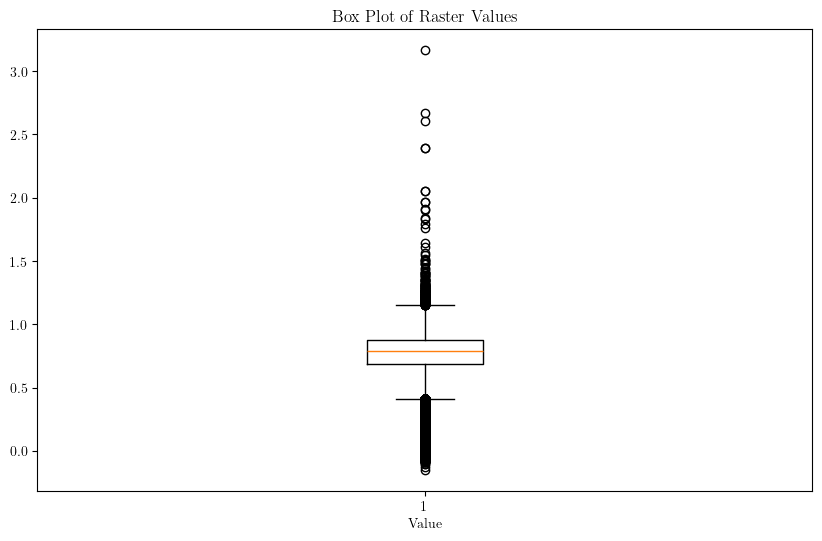

In [12]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Define the path to your raster file
raster_path = '/Users/supath/Downloads/GeoWorldCode/Data/EVI/landsat_8EVI.tif'

# Load the raster data
with rasterio.open(raster_path) as src:
    raster_data = src.read(1)  # Read the first band
    nodata = src.nodata

# Mask the nodata values
if nodata is not None:
    raster_data = np.ma.masked_equal(raster_data, nodata)

# Flatten the raster data and remove masked values (if any)
raster_values = raster_data.compressed() if np.ma.is_masked(raster_data) else raster_data.flatten()

# Plot the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(raster_values)
plt.title('Box Plot of Raster Values')
plt.xlabel('Value')
plt.show()


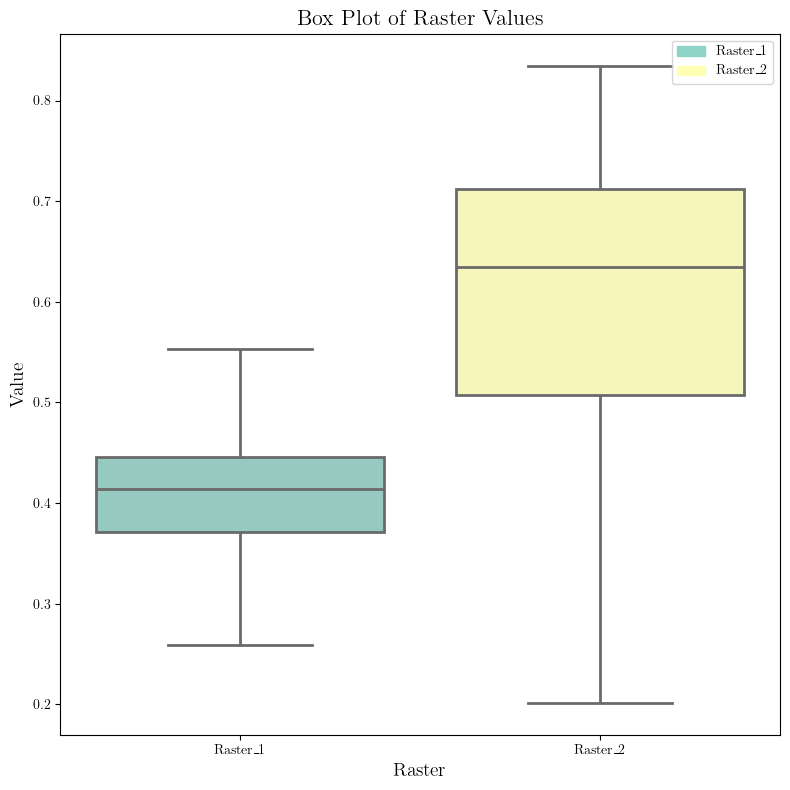

In [21]:
import os
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Directory containing raster files
directory = Path('../Data/NDVI')

# Initialize an empty list to store raster values
raster_values_list = []

# Iterate through each file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.tif'):  # Assuming all files are TIFF format
        # Load the raster data
        raster_path = directory / filename
        with rasterio.open(raster_path) as src:
            raster_data = src.read(1, masked=True)  # Read the first band with masking
        
        # Flatten the raster data and remove masked values (if any)
        raster_values = raster_data.compressed() if np.ma.is_masked(raster_data) else raster_data.flatten()
        
        # Append raster values to the list
        raster_values_list.append(raster_values)

# Create a DataFrame for Seaborn
import pandas as pd
df = pd.DataFrame()

# Add each raster values as a new column in the DataFrame
for i, values in enumerate(raster_values_list):
    df[f'Raster_{i+1}'] = values

# Plot the combined box plot using Seaborn
plt.figure(figsize=(8, 8))
sns.boxplot(data=df, palette="Set3", showfliers=False, linewidth=2)  # Disable outliers and increase linewidth for better visibility
plt.title('Box Plot of Raster Values', fontsize=16)
plt.ylabel('Value', fontsize=14)
plt.xlabel('Raster', fontsize=14)

# Customize legend with distinct colors
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

# Get the current palette colors
palette = sns.color_palette("Set3", n_colors=len(raster_values_list))

# Create custom legend handles
legend_handles = [Patch(color=color, label=f'Raster_{i+1}') for i, color in enumerate(palette)]

# Add legend
plt.legend(handles=legend_handles, loc='', fontsize=10)
# Remove grid lines
plt.grid(False)

plt.tight_layout()
plt.show()
